In [2]:
import matplotlib.pyplot as plt
import loompy
import numpy as np
import numpy_groupies as npg
import pandas as pd
from colors import colorize

In [3]:
all_cells = 'HumanMeningesDev_All_cells.loom'
all_cells_agg = 'HumanMeningesDev_All_cells.agg.loom'
all_cells_BC = 'Recombined3Clean2BC.loom'
meningioma = 'Meningioma.loom'
neural_cells = 'HumanMeningesDev_Neural.loom'
neural_crest_cells = 'HumanMeningesDev_Neural_crest.loom'
epithelial_cells = 'HumanMeningesDev_Epithelial.loom'
fibroblast_cells = 'HumanMeningesDev_Fibroblasts.loom'
vascular_perivascular_cells = 'HumanMeningesDev_Vascular_perivascular.loom'
vascular_endothelial_cells = 'HumanMeningesDev_Vascular_endothelial.loom'
erythropoietic_cells = 'HumanMeningesDev_Erythropoietic.loom'
immune_cells = 'HumanMeningesDev_Immune.loom'
Spatial_PCW9 = 'adata_dev_meninges_he24_pcw9_final_clusters_EE_dev_HE24-Men.loom'
Spatial_PCW6 = 'adata_dev_meninges_he27_pcw6_final_clusters_EE_dev_HE27a.loom'

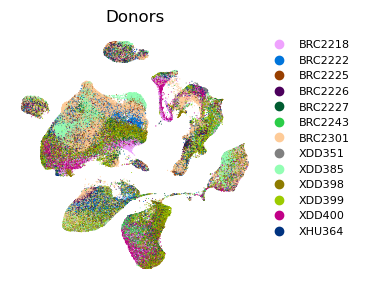

In [4]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(all_cells,'r') as ds:
    xy = ds.ca.UMAP
    names, labels = np.unique(ds.ca.Donor, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=0.5, rasterized=True)
    ax.axis('off')
    plt.title("Donors")
    
    ax2 = fig.add_axes([0.30, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1,
		frameon=False,
		fontsize=8)
    ax2.axis('off')

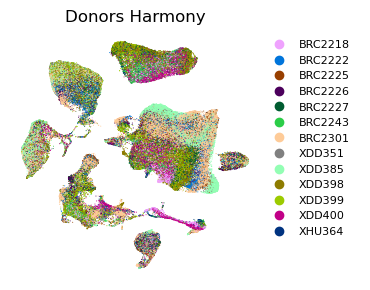

In [5]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(all_cells_BC, 'r') as ds:
    xy = ds.ca.UMAP
    names, labels = np.unique(ds.ca.Donor, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=0.5, rasterized=True)
    ax.axis('off')
    plt.title("Donors Harmony")
    
    ax2 = fig.add_axes([0.30, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1,
		frameon=False,
		fontsize=8)
    ax2.axis('off')

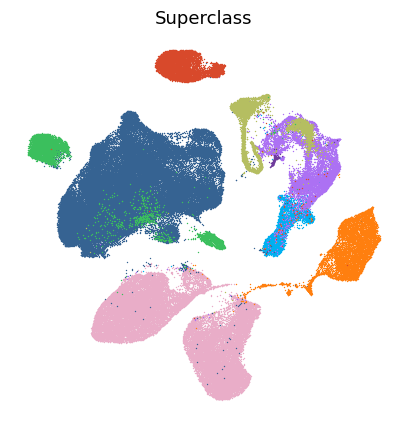

In [6]:
colors = ['#00B0F0','#E9ADC8','#366392','#FF7F0F','#AC71F3','#B5BE61','#6F3C9C','#3BBF5D','#D8492B'] 
Superclass = ['Epithelial','Erythropoietic','Fibroblast','Immune','Neural','Neural crest','Other','Vascular perivascular','Vascular endothelial'] 

plt.figure(None, (5,5))
with loompy.connect(all_cells, 'r') as ds:
    
    for i,a in enumerate(Superclass):
        ix = (ds.ca.Superclass == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], lw=0, s=1, rasterized=True)
        plt.axis('off')
        plt.title('Superclass',fontsize=13)

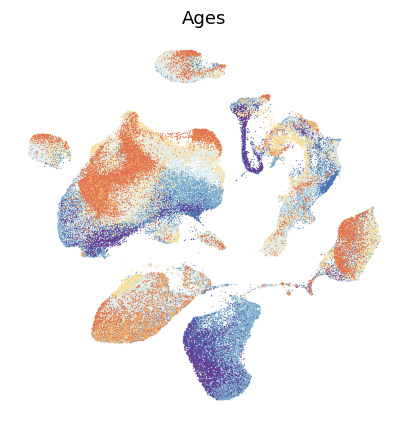

In [7]:
colors = ['#7EADCE','#4D74B2','#4D74B2','#683F97','#7EADCE','#B2D8E6','#FADF9E','#E3F2F9','#E3F2F9','#E17651','#F2B06C'] 
Age = ['7.5w','6.6w','6.7w','5.5w','7.6w','8.4w','10w','9w','9.9w','13.5w','12w']

plt.figure(None, (5,5))
with loompy.connect(all_cells, 'r') as ds:
    
    for i,a in enumerate(Age):
        exp = ds.ca.Agetext
        ix = (ds.ca.Agetext == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i], alpha = 0.7, lw=0, s=1, rasterized=True) #, c=colors[i]
        plt.axis('off')
        plt.title('Ages',fontsize=13)

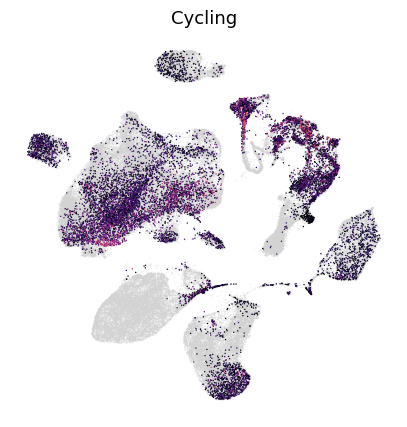

In [8]:
plt.figure(None, (5,5))
with loompy.connect(all_cells, 'r') as ds:
    
    exp = ds.ca.CellCycle
    ix = exp > 0.01
    plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], c='lightgrey', alpha=0.3,lw=0, s=1, rasterized = True)
    plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=exp[ix], cmap='magma',lw=0, s=1, rasterized = True)
    plt.axis('off')
    plt.title('Cycling',fontsize=13)

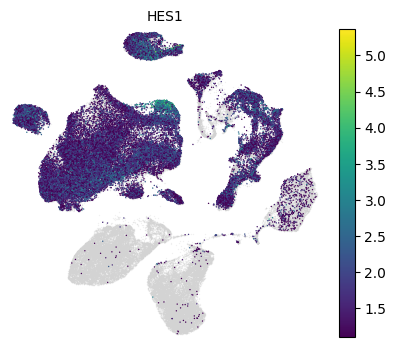

In [8]:
with loompy.connect(all_cells, 'r') as ds:
    
    plt.figure(None, (5, 4), facecolor='white')

    exp = np.log(ds[np.where(ds.ra.Gene == 'HES1')[0][0], :].flatten() + 1)
    exp_cells = exp > 1
    scatter = plt.scatter(ds.ca.UMAP[:, 0], ds.ca.UMAP[:, 1], color='lightgrey', alpha=0.3, s=1, lw=0, rasterized=True) #, lw=0, rasterized=True
    scatter =  plt.scatter(ds.ca.UMAP[exp_cells, 0], ds.ca.UMAP[exp_cells, 1], c=exp[exp_cells], s=1, lw=0, rasterized=True) #, lw=0, rasterized=True
    plt.colorbar(scatter, label ='')
    plt.axis('off')
    plt.title('HES1', fontsize=10)
    plt.margins(0.01, 0.01)   
    plt.show()

In [10]:
from cytograph.enrichment import FeatureSelectionByVariance
from cytograph.embedding import art_of_tsne
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def all_QC_plots(ds: loompy.LoomConnection = None, out_file: str = "Tmp.png"):
	f, ax = plt.subplots(4, 2, figsize=(2 * 8, 4 * 8))
	
	plot_title = "Mitochondrial gene expression ratio distribution"
	dist_attr(ax[0, 0], ds, attr = "MT_ratio", plot_title= plot_title, line=0.05)
	plot_title = "Unspliced reads ratio distribution"
	dist_attr(ax[0, 1], ds, attr = "unspliced_ratio", plot_title= plot_title, line=0.5)
	attrs_on_TSNE(ax[1:4, 0:2], ds, attrs = ["DoubletFinderFlag", "DoubletFinderScore", "TotalUMI", "NGenes", "unspliced_ratio", "MT_ratio"], plot_title = ["Doublets Flag", "Doublets Score", "UMI counts", "Number of genes per cell", "Unspliced UMI ratio", "Mitochondrial genes ratio"])
	
	f.savefig(out_file, dpi=144)
	plt.close(f)

def dist_attr(ax: plt.axes = None, ds: loompy.LoomConnection = None, out_file: str = None, attr: str = None, plot_title: str = None, line: float = None):
	if ax is None:
		fig, ax = plt.subplots(figsize=(6, 4))
	if attr in ds.ca:
		ax.hist(ds.ca[attr], bins = 100)
		ax.set_xlim(np.amin(ds.ca[attr]), np.amax(ds.ca[attr]))
		if line is not None:
			ax.axvline(x=line, c='r')
		if plot_title is not None:
			ax.set_title(plot_title)
		if out_file is not None:
			fig.savefig(out_file, dpi=144)
		return(ax)

def attrs_on_TSNE(ax: plt.axes = None, ds: loompy.LoomConnection = None, out_file: str = None, attrs: list = None, plot_title: list = None):
	n_attr = len(attrs)
	n_cols = 2
	n_rows = np.ceil(n_attr / n_cols)
	n_rows = n_rows.astype(int)
	if ax is None and n_attr > 1:
		fig, ax = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 8 * n_rows))
	elif ax is None and n_attr == 1:
		fig, ax = plt.subplots(figsize=(12, 12))
	n_cols_plot = 0
	n_rows_plot = 0
	if 'UMAP' in ds.ca:
		xy = ds.ca.UMAP
	elif 'HPF' in ds.ca:
		xy = art_of_tsne(ds.ca.HPF)
		ds.ca.TSNE = xy
	elif 'PCA' in ds.ca:
		angle = 0.5
		perplexity = 30
		verbose = False
		xy = TSNE(angle=angle, perplexity=perplexity, verbose=verbose).fit_transform(ds.ca.PCA)
		ds.ca.TSNE = xy
	else:
		genes = FeatureSelectionByVariance(2000).fit(ds)
		data = ds[:, :]
		f = np.divide(data.sum(axis=0), 10e6)
		norm_data = np.divide(data, f)
		norm_data = np.log(norm_data + 1)
		ds.ca.PCA = PCA(n_components=50).fit_transform(norm_data[genes, :].T)
		angle = 0.5
		perplexity = 30
		verbose = False
		xy = TSNE(angle=angle, perplexity=perplexity, verbose=verbose).fit_transform(ds.ca.PCA)
		ds.ca.TSNE = xy
	
	for n, attr in enumerate(attrs):
		# ax.append( plt.subplot(n_rows,n_cols,n+1))
		if(n_attr == 1):
			current_ax = ax
		if(n_attr == 2):
			current_ax = ax[n_cols_plot]
		if(n_attr > 2):
			current_ax = ax[n_rows_plot, n_cols_plot]
		if attr in ds.ca:
			current_ax.scatter(xy[:, 0], xy[:, 1], c='lightgrey', lw=0, s=10)
			names, labels = np.unique(ds.ca[attr], return_inverse=True)
			if (len(names) > 20):
				labels = ds.ca[attr]
				if(np.max(ds.ca[attr]) > 10000):
					labels = np.log(labels)
					if plot_title is not None:
						current_ax.set_title(plot_title[n] + " (log transformed)")
				elif plot_title is not None:
					current_ax.set_title(plot_title[n])
				cm = plt.cm.get_cmap('jet')
				cells = ds.ca[attr] > 0
				sc = current_ax.scatter(xy[:, 0][cells], xy[:, 1][cells], c=labels[cells], lw=0, s=10, cmap = cm)
				plt.colorbar(sc, ax=current_ax)
			else:
				colors = colorize(names)
				cells = np.random.permutation(labels.shape[0])
				current_ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=10)

				def h(c):
					return plt.Line2D([], [], color=c, ls="", marker="o")
				current_ax.legend(handles=[h(colors[i]) for i in range(len(names))], labels=list(names), loc='lower left', markerscale=1, frameon=False, fontsize=10)
				if plot_title is not None:
					current_ax.set_title(plot_title[n])
		else:
			current_ax.scatter(xy[:, 0], xy[:, 1], c='lightgrey', lw=0, s=10)
			if plot_title is not None:
				current_ax.set_title(plot_title[n])
		if(n_cols_plot != n_cols - 1):
			n_cols_plot = n_cols_plot + 1
		else:
			n_cols_plot = 0
			n_rows_plot = n_rows_plot + 1
	if out_file is not None:
		fig.savefig(out_file, dpi=144)
	return(ax)

/var/lib/condor/execute/dir_3304100/ipykernel_3881963/3460131959.py:86: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('jet')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/elin.vinsland/Documents/meninges/manuscript/figures/all/QC_UMAPs.png'

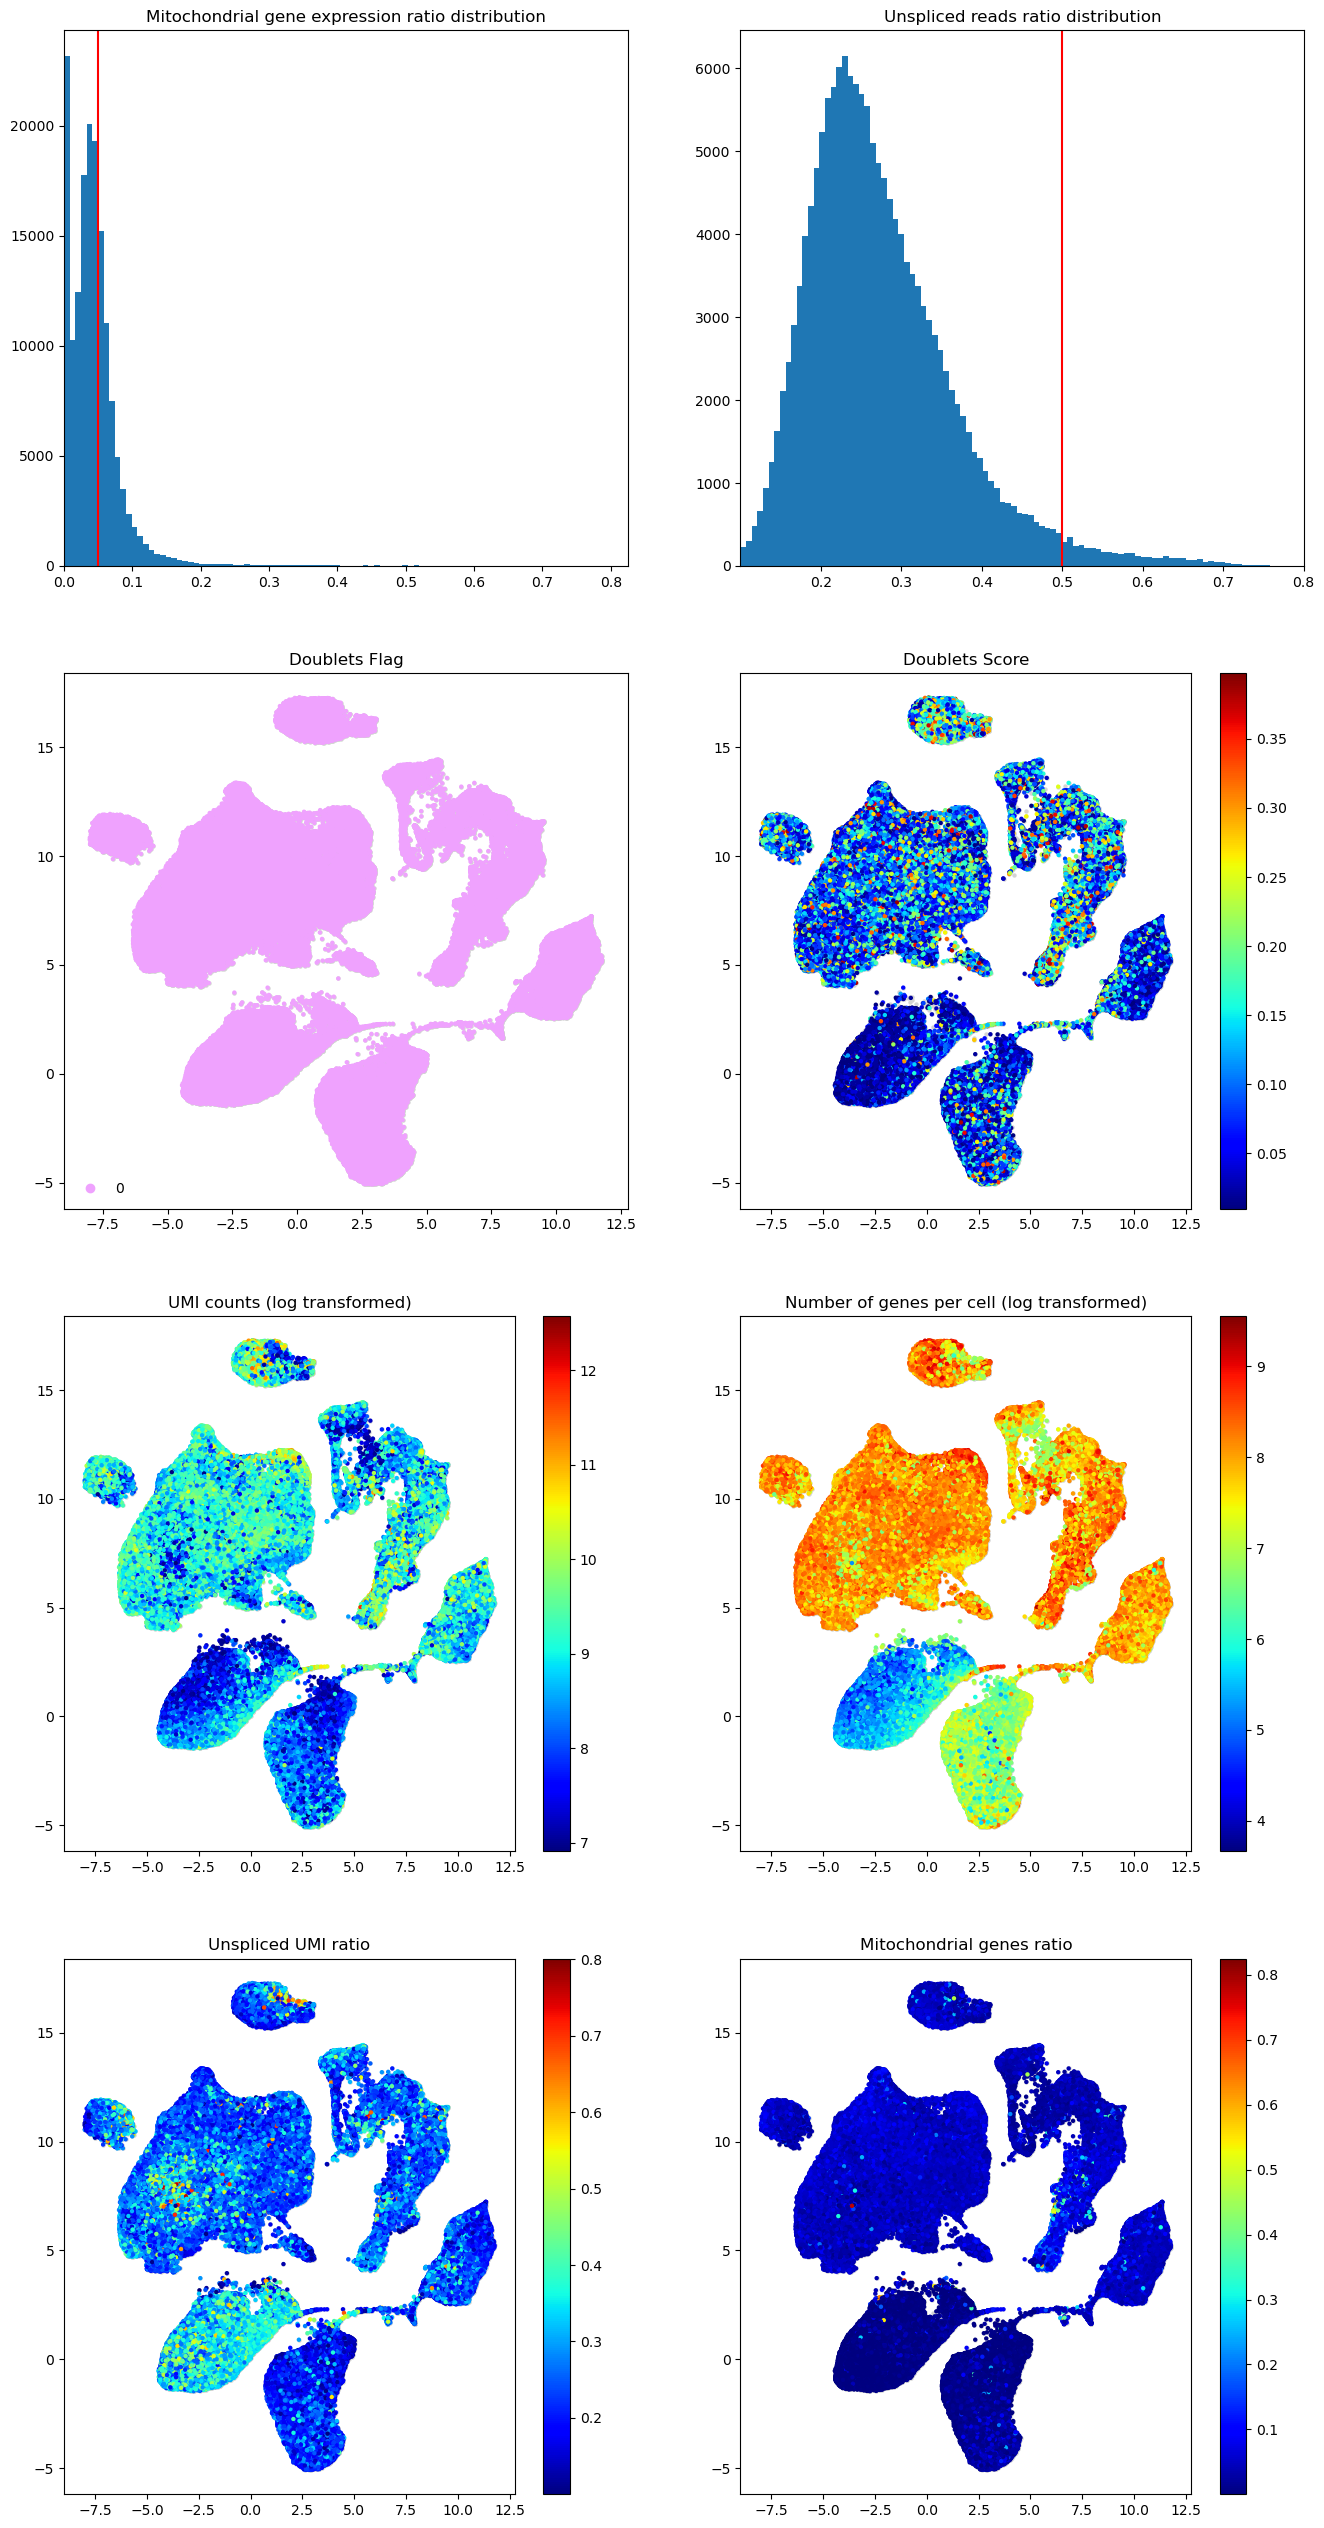

In [11]:
with loompy.connect(all_cells, 'r') as ds:
    all_QC_plots(ds, '/Users/elin.vinsland/Documents/meninges/manuscript/figures/all/QC_UMAPs.png')

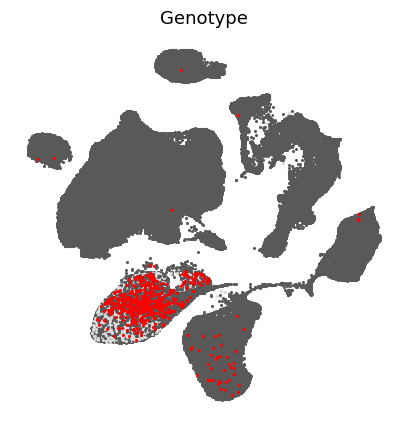

In [12]:
colors = ['#D9D9D9','#D9D9D9','#595959','#D9D9D9','#D9D9D9','#595959','#ff0000'] 
Age = ['doublet-0/1', 'n/a', 'unassigned-0','unassigned-0/1', 'unassigned-1/0', 'singlet-0', 'singlet-1']

plt.figure(None, (5,5))
with loompy.connect(all_cells, 'r') as ds:
    for i,a in enumerate(Age):
        exp = ds.ca.Souporcell
        ix = (ds.ca.Souporcell == a)
        plt.scatter(ds.ca.UMAP[ix, 0], ds.ca.UMAP[ix, 1], c=colors[i],lw=0, s=5) #, c=colors[i]
        plt.axis('off')
        plt.title('Genotype',fontsize=13)

In [13]:
with loompy.connect(all_cells, 'r') as ds:
    print('Class:')
    for i in np.unique(ds.ca.Superclass):
        classAnn = len(np.unique(ds.ca.ClassAnn[ds.ca.Superclass == i]))
        print(i, classAnn)
    print(' ')
    
    print('Subclass:')
    for i in np.unique(ds.ca.Superclass):
        subclass = len(np.unique(ds.ca.Subclass[ds.ca.Superclass == i]))
        print(i, subclass)
    print(' ')
    
    print('CellType:')
    for i in np.unique(ds.ca.Superclass):
        ClusterText = len(np.unique(ds.ca.ClusterText[ds.ca.Superclass == i]))
        print(i, ClusterText)
    print(' ')
    
    print('Clusters:')
    for i in np.unique(ds.ca.Superclass):
        Clusters = len(np.unique(ds.ca.Clusters[ds.ca.Superclass == i]))
        print(i, Clusters)
    print(' ')
    
    print('n_cells:')
    for i in np.unique(ds.ca.Superclass):
        n_cells = len(np.unique(ds.ca.CellID[ds.ca.Superclass == i]))
        print(i, n_cells)
    print(' ')

Class:
Epithelial 2
Erythropoietic 3
Fibroblast 10
Immune 2
Neural 12
Neural crest 5
Other 1
Vascular endothelial 6
Vascular perivascular 5
 
Subclass:
Epithelial 4
Erythropoietic 6
Fibroblast 21
Immune 20
Neural 31
Neural crest 7
Other 1
Vascular endothelial 10
Vascular perivascular 6
 
CellType:
Epithelial 4
Erythropoietic 6
Fibroblast 29
Immune 20
Neural 31
Neural crest 7
Other 1
Vascular endothelial 12
Vascular perivascular 6
 
Clusters:
Epithelial 13
Erythropoietic 56
Fibroblast 55
Immune 26
Neural 42
Neural crest 19
Other 2
Vascular endothelial 16
Vascular perivascular 16
 
n_cells:
Epithelial 6923
Erythropoietic 36639
Fibroblast 71657
Immune 8517
Neural 11800
Neural crest 6440
Other 149
Vascular endothelial 7446
Vascular perivascular 7155
 


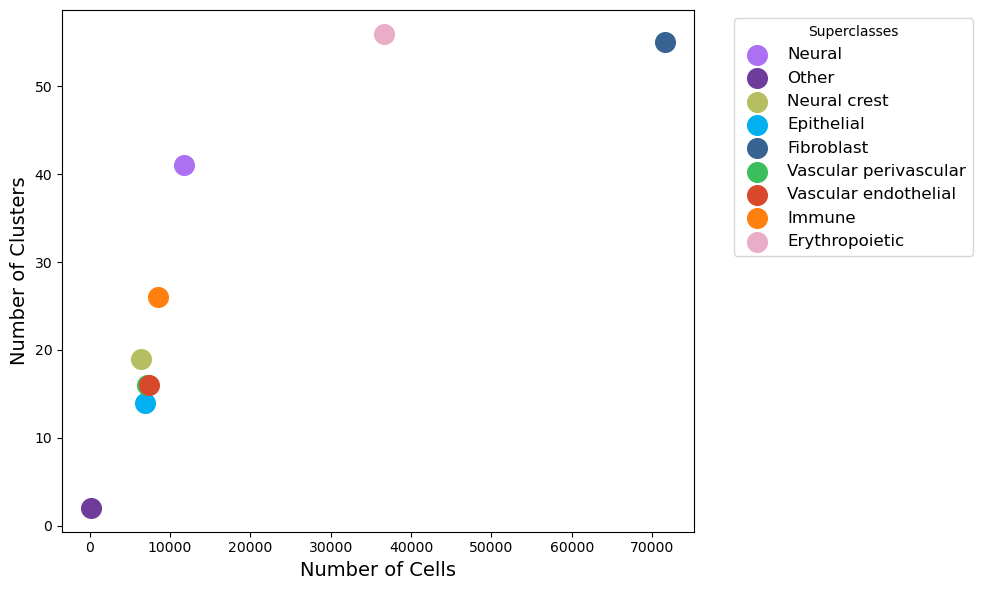

In [14]:
superclasses = ['Neural', 'Other', 'Neural crest', 'Epithelial', 'Fibroblast', 
                'Vascular perivascular', 'Vascular endothelial', 'Immune', 'Erythropoietic']
colors = ['#AC71F3', '#6F3C9C', '#B5BE61', '#00B0F0', '#366392', 
          '#3BBF5D', '#D8492B', '#FF7F0F', '#E9ADC8']
N_cells = [11800, 149, 6440, 6923, 71657, 7155, 7446, 8517, 36639]
N_clusters = [41, 2, 19, 14, 55, 16, 16, 26, 56]

plt.figure(figsize=(10, 6))
for i, superclass in enumerate(superclasses):
    plt.scatter(N_cells[i], N_clusters[i], color=colors[i], label=superclass, s=200, marker='o')

plt.xlabel('Number of Cells', fontsize=14)
plt.ylabel('Number of Clusters', fontsize=14)
plt.legend(title="Superclasses", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
#plt.savefig('all_scatter_cells_clusters.pdf',dpi=300)
plt.show()

In [15]:
with loompy.connect(all_cells, 'r') as ds:
    for i in np.unique(ds.ca.Age):
        nc = (np.sum(ds.ca.Age == i))
        print(i, nc)

5.5 13307
6.6 6352
6.7 9894
7.5 37920
7.6 10433
8.4 9550
9.0 8848
9.9 6180
10.0 35317
12.0 2660
13.5 16265


In [16]:
with loompy.connect(meningioma, 'r') as ds:
    print(ds.shape)

(33538, 64888)


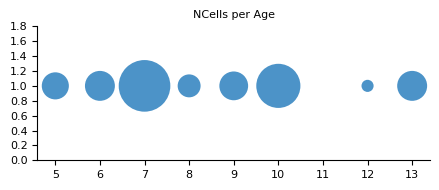

In [17]:
fig, ax = plt.subplots(figsize=(4.5,2))

xtick = [5,6,7,8,9,10,11,12,13]
data = [1,1,1,1,1,1,1,1,1]

size = [13307, 16246, 48353, 9550, 15028, 35317, 0, 2660, 16265]
factor = np.round(np.log10(np.max(size))) - 4
Bubble_size = [size / 35**factor]
#print(Bubble_size)

ax.scatter(range(len(data)), data, s=Bubble_size, lw=0, rasterized=True, color='#4C93C8')

plt.xticks(range(len(xtick)), xtick, rotation='horizontal', fontsize=8)
plt.yticks(np.arange(0, 2, 0.2), fontsize=8) 
plt.title('NCells per Age', fontsize=8)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
#plt.savefig('NCells_timepoints_dotplot.pdf',dpi=300)
plt.show()

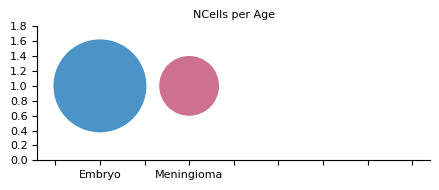

In [18]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4.5,2))

color = ['#4C93C8','#4C93C8','#4C93C8','#CE7191','#4C93C8','#4C93C8','#4C93C8','#4C93C8','#4C93C8']
xtick = ['','Embryo','','Meningioma','','','','','']

data = [1,1,1,1,1,1,1,1,1]

size = [0, 156726, 0, 64888, 0, 0, 0, 0, 0]
factor = np.round(np.log10(np.max(size))) - 4
Bubble_size = [size / 35**factor]
#print(Bubble_size)

ax.scatter(range(len(data)), data, s=Bubble_size, lw=0, rasterized=True, color=color) #, s=sizes/30, color='#4C93C8'

plt.xticks(range(len(xtick)), xtick, rotation='horizontal', fontsize=8)
plt.yticks(np.arange(0, 2, 0.2), fontsize=8)  # Set label locations.
plt.title('NCells per Age', fontsize=8)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.tight_layout()
plt.show()

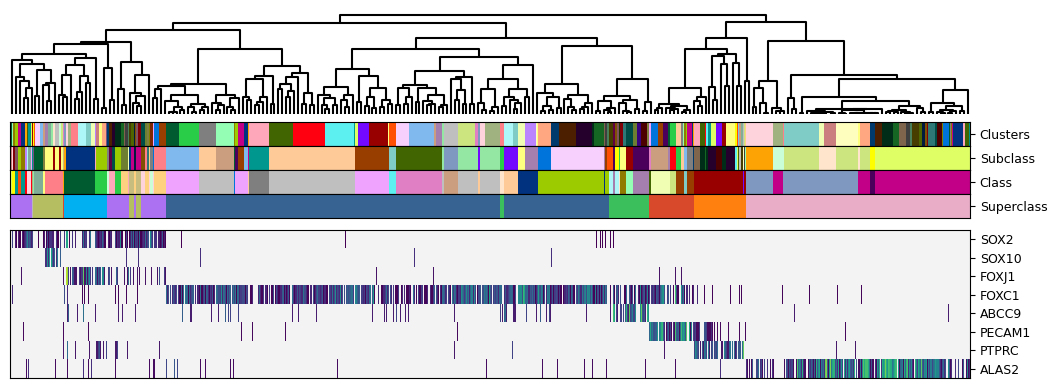

In [19]:
import matplotlib.colors as mcolors
from scipy.cluster.hierarchy import dendrogram

colors = ['#00B0F0', '#E9ADC8', '#366392', '#FF7F0F', '#AC71F3', '#B5BE61', '#6F3C9C', '#3BBF5D', '#D8492B','#B9B9B9']
Superclass = ['Epithelial', 'Erythropoietic', 'Fibroblast', 'Immune', 'Neural', 'Neural crest', 'Other', 'Vascular perivascular', 'Vascular endothelial','Other']
color_map_superclass = {superclass: color for superclass, color in zip(Superclass, colors)}

def colorize_superclass(superclass_data):
    """Map Superclass categories to their corresponding colors."""
    return [color_map_superclass.get(sc, '#FFFFFF') for sc in superclass_data]

fig = plt.figure(figsize=(12, 8))

# Plot dendrogram
with loompy.connect(all_cells_agg, 'r') as ds:
    ax_dendro = fig.add_axes([0.1, 0.75, 0.8, 0.13])
    dendrogram(ds.attrs.linkage, color_threshold=0, above_threshold_color='black', leaf_font_size=9)
    ax_dendro.axis('off')

# Plot category bars
with loompy.connect(all_cells, 'r') as ds:
    bar_positions = [0.71, 0.68, 0.65, 0.62]
    labels = ['Clusters', 'Subclass', 'Class', 'Superclass']
    data_sources = [
        colorize(ds.ca.Clusters),
        colorize(ds.ca.Subclass),
        colorize(ds.ca.ClassAnn),
        colorize_superclass(ds.ca.Superclass)
    ]
    
    for pos, label, data in zip(bar_positions, labels, data_sources):
        ax_bar = fig.add_axes([0.1, pos, 0.8, 0.03]) 
        if label == 'Superclass':  # Convert hex to RGB for Superclass
            data_rgb = np.array([mcolors.to_rgb(c) for c in data])
        else:
            data_rgb = data
        ax_bar.imshow(np.expand_dims(data_rgb, axis=0), aspect='auto', interpolation='none')
        ax_bar.set_yticks([0])
        ax_bar.set_yticklabels([label], fontsize=9)
        ax_bar.yaxis.tick_right()
        ax_bar.set_xticks([])

    # Plot gene expression heatmap
    ax_heatmap = fig.add_axes([0.1, 0.42, 0.8, 0.185]) 
    genes_to_plot = ['SOX2','SOX10','FOXJ1','FOXC1','ABCC9','PECAM1','PTPRC','ALAS2']
    data = np.vstack([ds[ds.ra.Gene == g, :].flatten() for g in genes_to_plot])
    data_norm = np.log2(data + 1)
    data_norm = (data_norm.T / np.percentile(data_norm, 100, axis=1)).T
    data_norm = np.ma.masked_where(data == 0, data_norm)
    
    bg = np.zeros_like(data) + 0.95
    ax_heatmap.imshow(bg, vmin=0, vmax=1, alpha=1, cmap=plt.cm.gray, aspect="auto", interpolation="nearest", resample=False)
    ax_heatmap.imshow(data_norm, aspect='auto', interpolation='nearest', cmap='viridis')
    ax_heatmap.set_yticks(range(len(genes_to_plot)))
    ax_heatmap.set_yticklabels(genes_to_plot, fontsize=9)
    ax_heatmap.yaxis.tick_right()
    ax_heatmap.set_xticks([])

plt.show() 

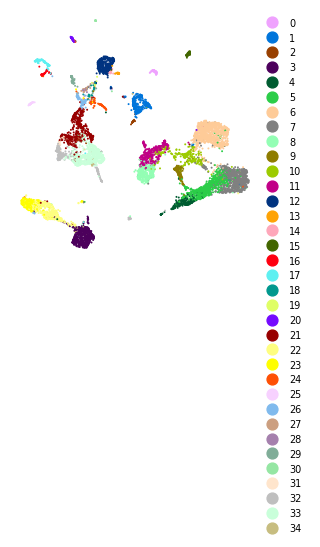

In [30]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(neural_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=2)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

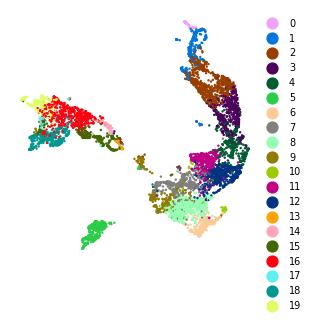

In [32]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(neural_crest_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=3)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

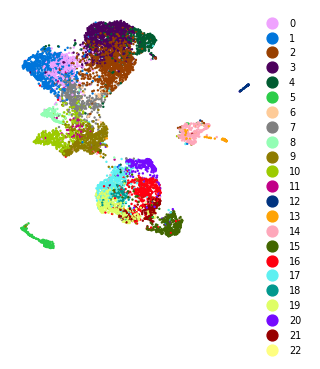

In [33]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(epithelial_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=3)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

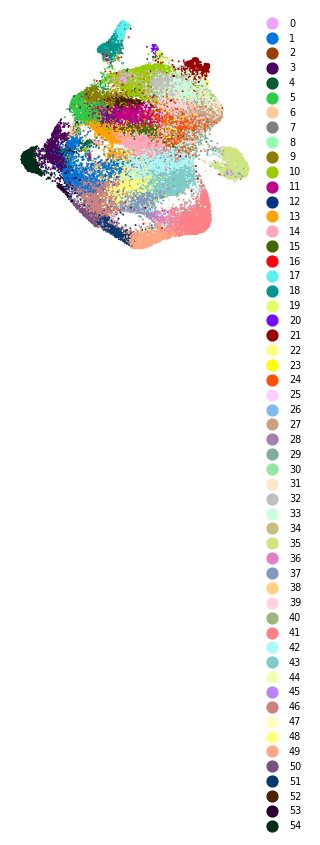

In [34]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(fibroblast_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=2)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

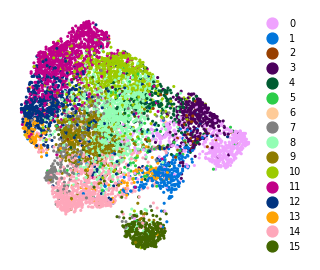

In [35]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(vascular_perivascular_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=5)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

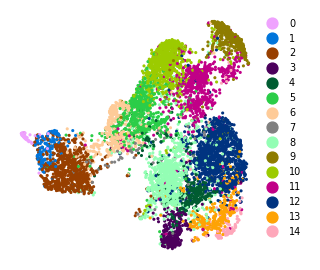

In [36]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(vascular_endothelial_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=5)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

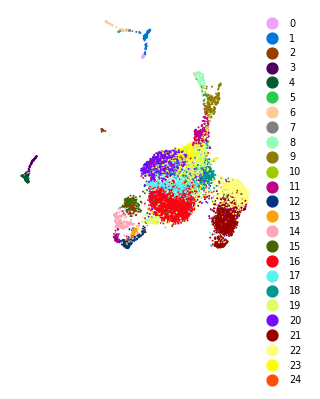

In [37]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(immune_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=2)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

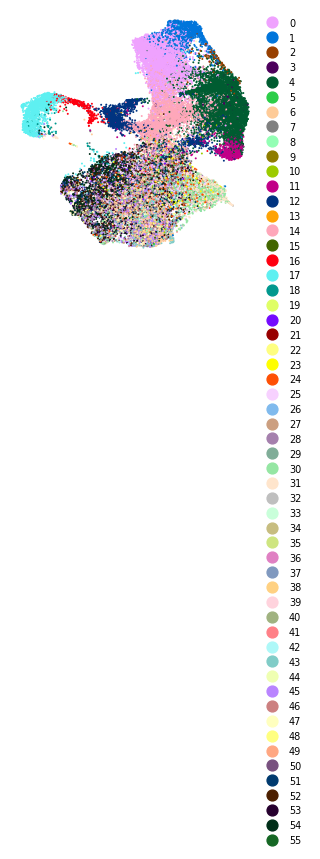

In [38]:
fig = plt.figure(None, (10, 2.5))
with loompy.connect(erythropoietic_cells,'r') as ds:
    xy = ds.ca.UMAP
    
    names, labels = np.unique(ds.ca.Clusters, return_inverse=True)
    colors = colorize(names)
    cells = np.random.permutation(labels.shape[0])
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    ax.scatter(xy[cells, 0], xy[cells, 1], c=colors[labels][cells], lw=0, s=2)
    ax.axis('off')
    
    ax2 = fig.add_axes([0.25, 0, 0.05, 1])
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.3,
		frameon=False,
		fontsize=7)
    ax2.axis('off')

# Enriched

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
with loompy.connect(all_cells, 'r') as ds:
    labels = ds.ca.ClassAnn
    print(labels)

['Oligodendrocyte lineage' 'Oligodendrocyte lineage'
 'Oligodendrocyte lineage' ... 'ChP Definitive' 'ChP Definitive'
 'ChP Definitive']


In [41]:
le = LabelEncoder().fit(labels)

In [42]:
label_ix = le.transform(labels)
label_ix

array([25, 25, 25, ...,  3,  3,  3])

In [43]:
le.inverse_transform(label_ix) 

array(['Oligodendrocyte lineage', 'Oligodendrocyte lineage',
       'Oligodendrocyte lineage', ..., 'ChP Definitive', 'ChP Definitive',
       'ChP Definitive'], dtype=object)

In [44]:
with loompy.connect(all_cells, 'r') as ds:
    labels = ds.ca.ClassAnn
    le = LabelEncoder().fit(labels)
    label_ix = le.transform(labels)
    means = npg.aggregate(label_ix, ds[:, :], func='mean', axis=1)

In [45]:
with loompy.connect(all_cells, 'r') as ds:
    batch_size = 1000
    n_clusters = label_ix.max() + 1
    nonzeros = np.empty((ds.shape[0], n_clusters))

    for ix in range(0, ds.shape[0], batch_size):
        vals = ds[ix:ix + batch_size, :]
        nnz = npg.aggregate(label_ix, vals > 0, func='sum', axis=1)
        nonzeros[ix:ix + batch_size, :] = nnz

In [46]:
n_clusters = means.shape[1]
cluster_size = np.bincount(label_ix)
f_nnz = nonzeros / cluster_size

# calculate enrichment scores
enrichment = np.zeros_like(means)
for j in range(n_clusters):
    # calculate cluster weights
    ix = np.arange(n_clusters) != j
    weights = cluster_size[ix] / cluster_size[ix].sum()
    # calculate means_other as weighted average
    means_other = np.average(means[:, ix], weights=weights, axis=1)
    # calculate f_nnz as weighted average
    f_nnz_other = np.average(f_nnz[:, ix], weights=weights, axis=1)
    # calculate enrichment
    enrichment[:, j] = (f_nnz[:, j] + 0.1) / (f_nnz_other + 0.1) * (means[:, j] + 0.01) / (means_other + 0.01)

In [47]:
dict(zip(label_ix, le.inverse_transform(label_ix))) 

{25: 'Oligodendrocyte lineage',
 19: 'Interneuron',
 24: 'Neuron',
 39: 'Radial glia',
 23: 'Neuroblast',
 18: 'Intermediate progenitor',
 16: 'Glioblast',
 26: 'Optic',
 40: 'Rathkes pouch',
 30: 'Peripheral neuron',
 29: 'Peripheral neuroblast',
 22: 'Neural crest progenitor',
 41: 'Schwann cell lineage',
 13: 'Endothelial',
 4: 'ChP Epithelial',
 21: 'Myeloid',
 5: 'ChP Epithelial progenitor',
 33: 'Pinealocyte',
 14: 'Epithelial',
 38: 'Progenitor',
 34: 'Pre-EMT neural crest',
 27: 'Other',
 0: 'Arachnoid',
 32: 'Pia',
 1: 'Arachnoid-Dura',
 6: 'ChP Fibroblast',
 7: 'ChP Meningeal',
 17: 'Hindbrain',
 36: 'Primary meninx',
 31: 'Perivascular',
 12: 'Dura',
 10: 'Chondrogenic',
 42: 'Smooth muscle cell',
 28: 'Pericyte',
 9: 'ChP Perivascular',
 8: 'ChP Pericyte',
 44: 'Venous',
 15: 'Fatty acid metabolic',
 35: 'Primary',
 2: 'Arterial',
 43: 'Tip cell',
 20: 'Lymphoid',
 37: 'Primitive',
 11: 'Definitive',
 3: 'ChP Definitive'}

In [48]:
with loompy.connect(all_cells, 'r') as ds:
    
    top_genes = ds.ra.Gene[np.argsort(enrichment[:, 0])[::-1]] #
top_genes[:10]

array(['SLC22A6', 'PTGDS', 'SERPIND1', 'SLC13A3', 'ITGBL1', 'GJB6',
       'BMP3', 'SLC7A11', 'RANBP3L', 'GJB2'], dtype=object)

In [49]:
import pandas as pd
with loompy.connect(all_cells, 'r') as ds:
      
    n_labels = label_ix.max() + 1
    n_markers = 3

    included = []
    for ix in range(n_labels):
        print(ix)
        enriched = np.argsort(enrichment[:, ix])[::-1]
        n = 0
        count = 0
        while count < n_markers:
            included.append(enriched[n])
            n += 1
            count += 1
            
    markers = np.array(included)
    print(ds.ra.Gene[markers])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
['SLC22A6' 'PTGDS' 'SERPIND1' 'GABRB2' 'NOV' 'ITGBL1' 'GJA5' 'GJA4' 'DLL4'
 'HBB' 'HBG1' 'HBA2' 'ART3' 'FOLR1' 'ATP2B3' 'CDC20B' 'CCNO' 'C20orf85'
 'POSTN' 'TCF21' 'COLEC11' 'IFITM1' 'KERA' 'SLC6A1-AS1' 'HIGD1B' 'RASL12'
 'KCNJ8' 'CYGB' 'COLEC11' 'HIGD1B' 'PTX3' 'INHBA' 'SLIT3' 'HBB' 'KRT1'
 'ALAS2' 'SLC47A1' 'KCNMA1' 'PPDPFL' 'SELE' 'CFAP47' 'PMCH' 'OLFM3'
 'CALB1' 'SOST' 'FABP4' 'PLVAP' 'SELP' 'FGF17' 'BCAN' 'FGF8' 'IGFBP5'
 'HOXA7' 'HOXA3' 'OLIG3' 'IRX1' 'NALCN-AS1' 'DLX6-AS1' 'INA' 'NXPH1'
 'IL7R' 'TRBC1' 'KLRB1' 'CD14' 'C1QC' 'FOLR2' 'NEUROG1' 'PRDM12' 'NTN5'
 'EOMES' 'UNCX' 'MYT1L' 'ATOH1' 'DCC' 'RELN' 'OLIG1' 'OLIG2' 'UNCX' 'SIX6'
 'PAX2' 'FGF10' 'SGCZ' 'DIO3' 'PTCH1' 'KCNJ8' 'NODAL' 'RASL12' 'ISL1'
 'PPP1R17' 'TLX3' 'PRPH' 'NEFL' 'PAPPA2' 'TNMD' 'CCDC3' 'GRM3' 'ITIH2'
 'ALDH1A3' 'NGFR' 'BARHL2' 'CDH18' 'SORCS3' 'SOST' 'MAL' 'WT1' 'ALB'
 'APOA2' 'AFP' 'HAS

In [50]:
label_ix

array([25, 25, 25, ...,  3,  3,  3])

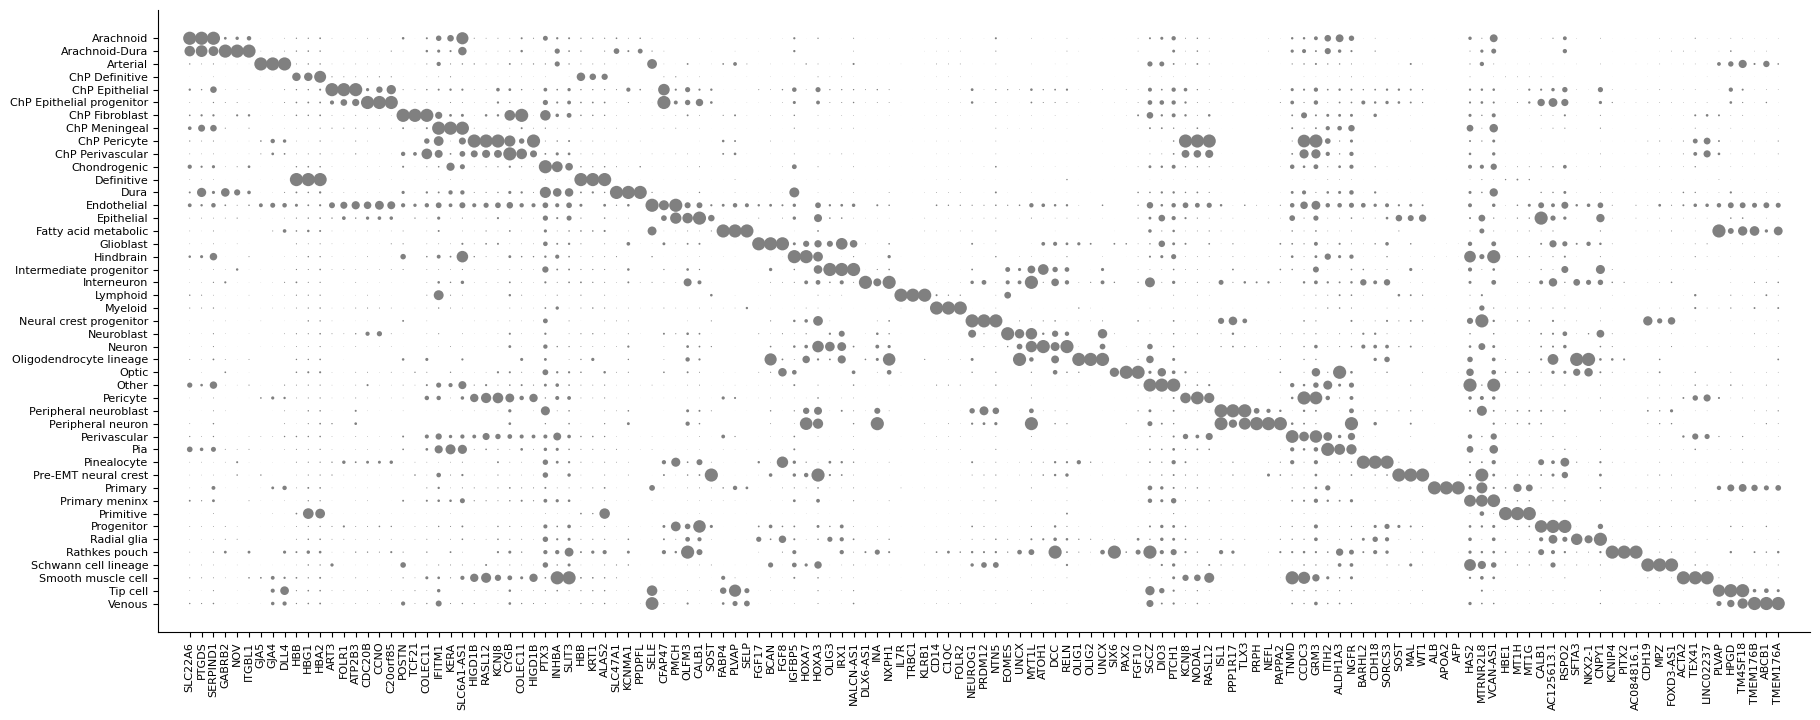

In [51]:
tick_labels = ['Arachnoid', 'Arachnoid-Dura', 'Arterial', 'ChP Definitive', 'ChP Epithelial', 'ChP Epithelial progenitor', 'ChP Fibroblast',
 'ChP Meningeal', 'ChP Pericyte', 'ChP Perivascular', 'Chondrogenic','Definitive', 'Dura', 'Endothelial', 'Epithelial', 'Fatty acid metabolic',
 'Glioblast', 'Hindbrain', 'Intermediate progenitor', 'Interneuron','Lymphoid', 'Myeloid', 'Neural crest progenitor', 'Neuroblast', 'Neuron',
 'Oligodendrocyte lineage', 'Optic', 'Other', 'Pericyte','Peripheral neuroblast', 'Peripheral neuron', 'Perivascular', 'Pia','Pinealocyte', 
               'Pre-EMT neural crest', 'Primary', 'Primary meninx','Primitive', 'Progenitor', 'Radial glia', 'Rathkes pouch',
               'Schwann cell lineage', 'Smooth muscle cell', 'Tip cell', 'Venous']

with loompy.connect(all_cells, 'r') as ds:
 
    plt.figure(figsize = (18, 7), tight_layout = {'pad': 0}) #3 GENES PER CLASS
    
    genes = ds.ra.Gene[markers] 
    unique_clusters = np.unique(label_ix) 
    n = len(unique_clusters)
    x = np.zeros((n, len(genes)))
    y = np.zeros((n, len(genes)))
    fnnz = np.zeros((n, len(genes)))
    means = np.zeros((n, len(genes)))
    
    for i, g in enumerate(genes):
        y[:, i] = np.arange(n)
        x[:, i] = np.array([i]*n)
        fnnz[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten() > 0, func='mean', fill_value=0)
        means[:, i] = npg.aggregate(label_ix, ds[ds.ra.Gene == g, :].flatten(), func='mean', fill_value=0)
        # normalize mean by max
        means[:, i] = means[:, i] / means[:, i].max()
    plt.scatter(x.flatten(), y.flatten(), s=means.flatten()*90, lw=0, c='grey')
    
    plt.yticks(np.arange(len(unique_clusters)), tick_labels, fontsize=8)
    plt.xticks(np.arange(len(genes)), genes, rotation='vertical', fontsize=8)
    
    plt.margins(0.02, 0.05)
    plt.gca().invert_yaxis()
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    #plt.savefig('all_Class_3enriched.pdf', dpi=300)

# Spatial

In [52]:
colors_6w = ['#8E81FF', '#1ce6ff', '#00B0F0', '#ff4a46', '#FF79C8', '#006fa6', '#8E8235','#ffdbe5',
                    '#ffff00', '#0000a6', '#63ffac', '#b79762', '#004d43', 
                    '#FCC6E0','#5a0007', '#c2ff99', '#997d87', '#6a3a4c', '#1b4400', '#B5BE61', 
                    '#3b5dff','#4a3b53', 
                    '#61615a', '#00c2a0', '#eec3ff', '#6b7900', '#ff2f80', '#ffaa92','#ff90c9', 
                    '#8fb0ff', '#d16100', '#ddefff', '#000035', '#7b4f4b', '#a1c299','#300018', 
                    '#0aa6d8', '#013349', '#7a4900', '#372101', '#ffb500', '#c2ffed','#a079bf', '#00846f', 
                    '#ff34ff', '#b903aa', '#4fc601', '#00489c', '#6a3a4c','#0cbd66', 
                    '#ba0900','#ff4a46', '#ff4a46'] 

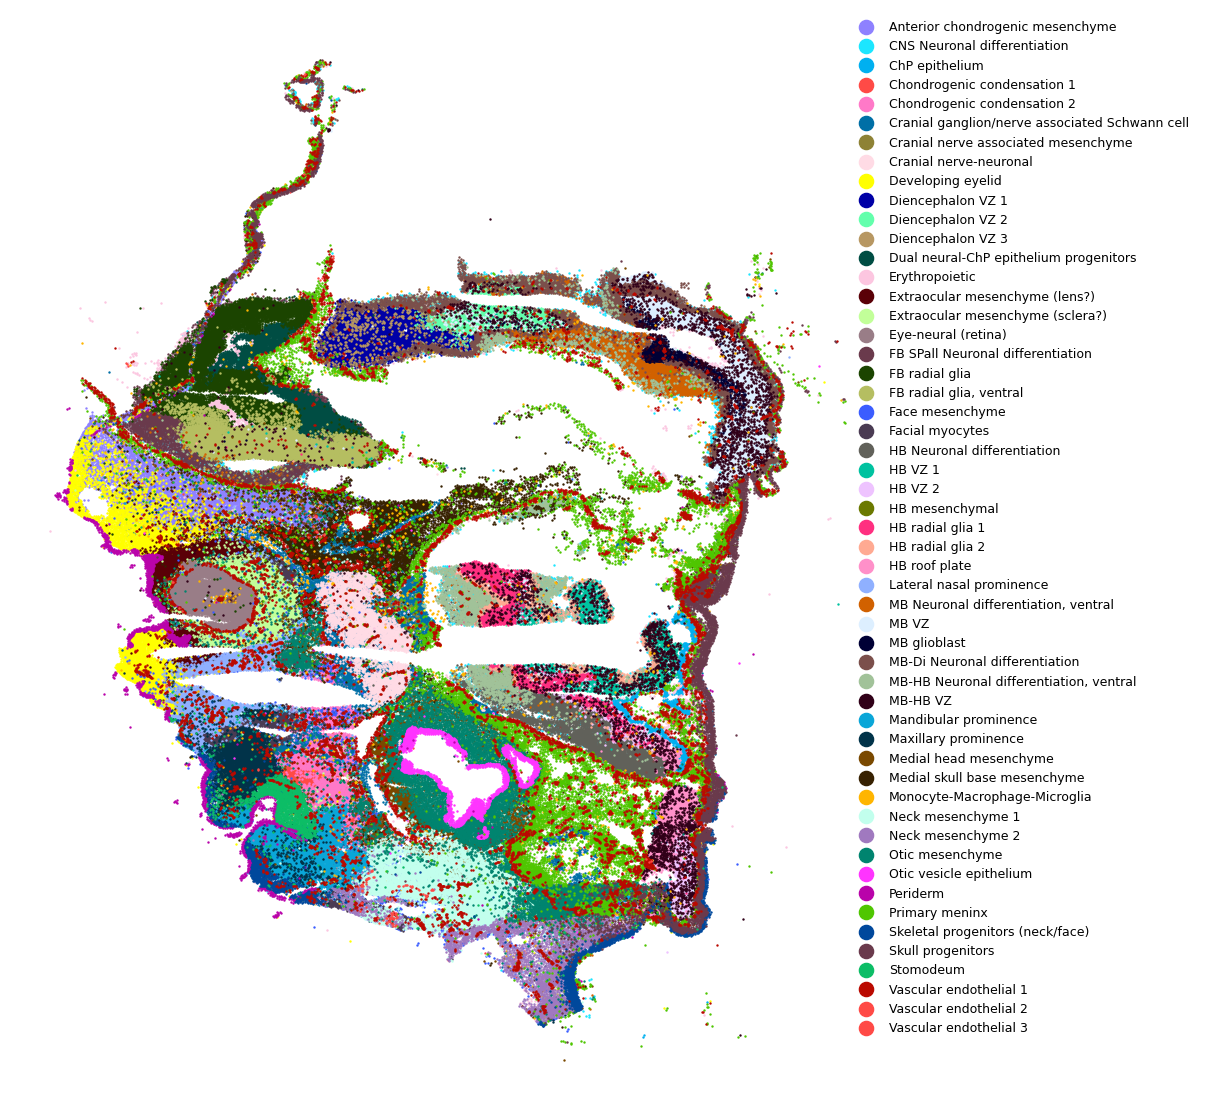

In [53]:
fig = plt.figure(None, (35, 11))
colors = colors_6w

with loompy.connect(Spatial_PCW6,'r') as ds:
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    Clusters = np.unique(ds.ca.cell_type_E)
    for i,a in enumerate(Clusters):
        ix = (ds.ca.cell_type_E == a)
        ax.scatter(ds.ca.x_centroid[ix], ds.ca.y_centroid[ix], c=colors[i], 
                    s=3, lw=0, rasterized=True)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.29, 0, 0.05, 1])
    names = np.unique(ds.ca.cell_type_E)
    labels = np.unique(ds.ca.cell_type_E)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.7,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

In [54]:
colors_9w = ['#F0E408', '#1ce6ff', '#ff34ff', '#0900A5', '#B89BF7', '#006fa6',
       '#a30059', '#CE5AAA','#B12484','#FF79C8', '#00B0F0', '#EBF814', '#63ffac', '#b79762',
                  '#85E3F4', '#8fb0ff','#448BFF','#2E75B6', '#2960FF','#9437CA', 
                  '#FCC6E0',
                  '#5a0007', '#809693', '#6a3a4c','#A26033',
       '#1b4400', '#c0b9b2', '#3b5dff', '#ffb500', '#71EBAB','#F63DAE', 
                  '#00c2a0', '#C79CB1', '#ff90c9', '#b903aa',
       '#d16100', '#008941', '#000035', '#7b4f4b', '#a1c299', '#300018',
       '#013349','#D783FF',  '#00846f', 
                  '#B5BE61','#265B35','#ba0900','#ff4a46','#3ACFC8','#AAF250']

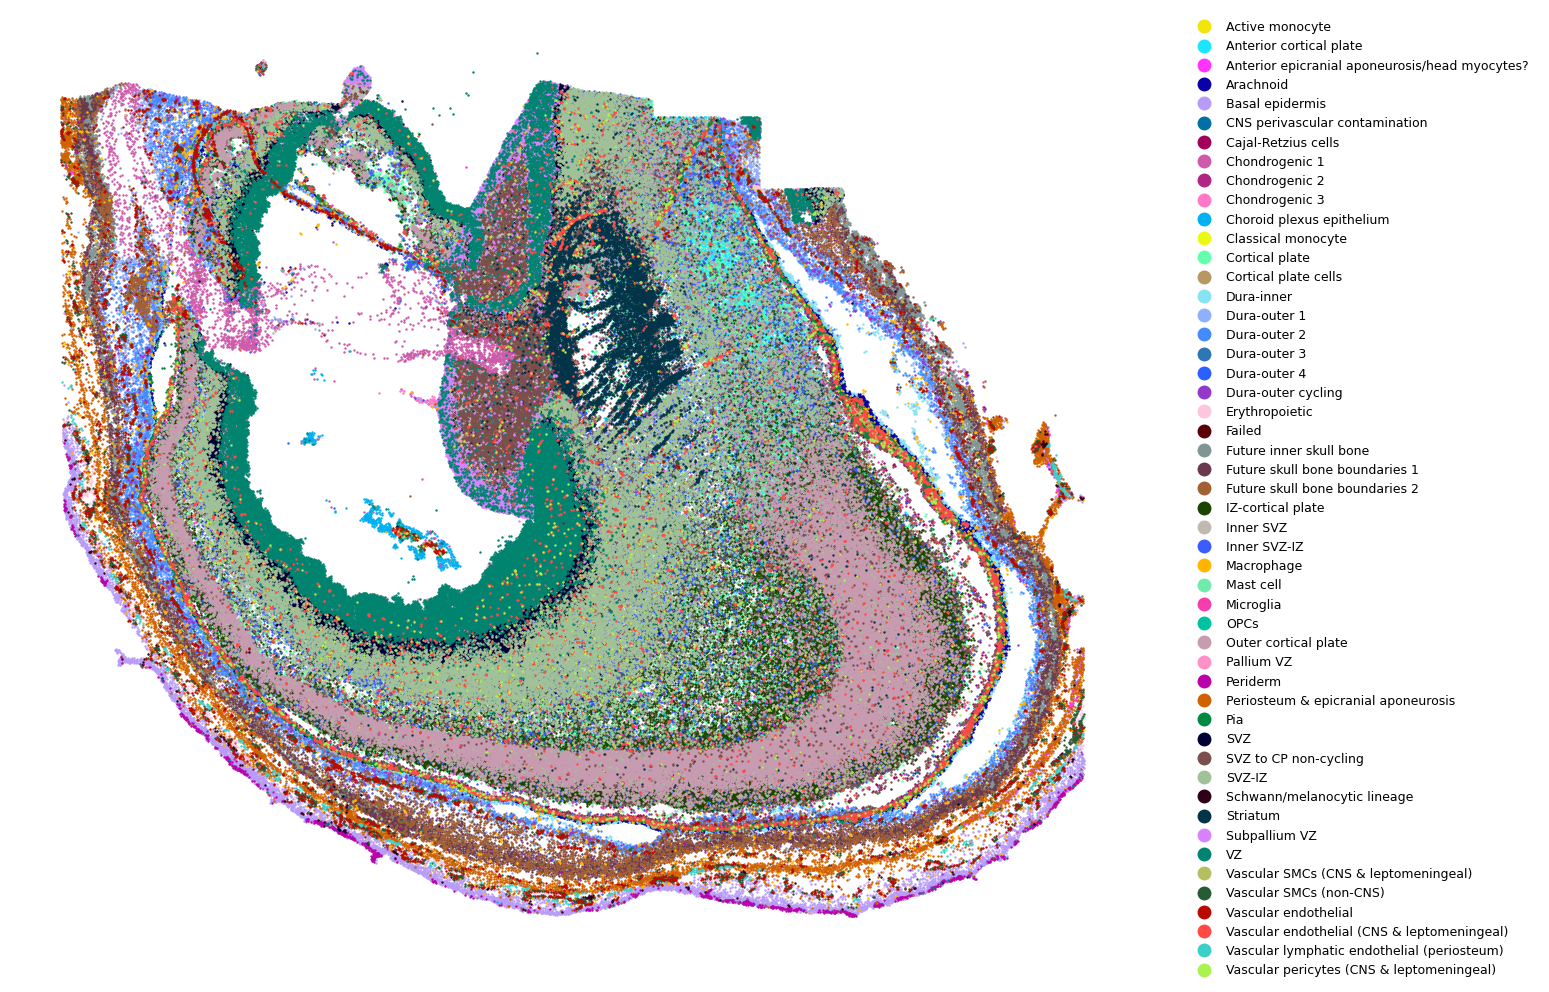

In [55]:
fig = plt.figure(None, (45, 9.5))
colors = colors_9w

with loompy.connect(Spatial_PCW9,'r') as ds:
    
    ax = fig.add_axes([0, 0, 0.25, 1])
    Clusters = np.unique(ds.ca.cell_type_E)
    for i,a in enumerate(Clusters):
        ix = (ds.ca.cell_type_E == a)
        ax.scatter(ds.ca.x_centroid[ix], ds.ca.y_centroid[ix], c=colors[i], 
                    s=3, lw=0, rasterized=True)
        ax.axis('off')
    
    ax2 = fig.add_axes([0.29, 0, 0.05, 1])
    names = np.unique(ds.ca.cell_type_E)
    labels = np.unique(ds.ca.cell_type_E)
    h = lambda c: plt.Line2D([], [], color=c, ls="", marker="o")
    ax2.legend(
		handles=[h(colors[i]) for i in range(len(names))],
		labels=list(names),
		loc='upper right',
		markerscale=1.5,
		frameon=False,
		fontsize=9)
    ax2.axis('off')

In [56]:
with loompy.connect(all_cells,'r') as ds:
    
    for i in np.unique(ds.ca.Clusters):
        cc = (np.sum(ds.ca.CellCycle[ds.ca.Clusters == i] > 0.01))/(np.sum(ds.ca.Clusters == i))*100
        print(cc)

18.75
2.5
0.0
4.0
2.272727272727273
3.8461538461538463
0.0
0.0
3.8461538461538463
14.583333333333334
43.38919925512104
21.042830540037244
41.15898959881129
22.916666666666664
38.23529411764706
56.57894736842105
40.74074074074074
13.793103448275861
30.8584686774942
13.966480446927374
26.25
15.217391304347828
1.9417475728155338
0.0
0.0
0.411522633744856
5.6751467710371815
46.33431085043988
35.645933014354064
45.719844357976655
13.986013986013987
14.798206278026907
17.391304347826086
17.8125
15.0
6.508875739644971
14.772727272727273
20.0
19.642857142857142
9.019607843137255
0.0
0.0
0.0
0.0
0.16778523489932887
2.127659574468085
3.50109409190372
0.0
12.476370510396976
19.271623672230653
4.615384615384616
16.844919786096256
25.052192066805844
31.147540983606557
21.836734693877553
11.788617886178862
7.4074074074074066
23.4251968503937
15.19434628975265
4.040404040404041
21.10726643598616
5.263157894736842
4.3478260869565215
21.304347826086957
15.730337078651685
46.464646464646464
10.582010582